In [1]:
import pandas as pd
from hdfs import InsecureClient



loading the csv file to hadoop
 
 hdfs dfs -copyFromLocal /Users/enginsan/Downloads/Historical_Wildfires.csv /user/enginsan

 


In [2]:
#reading from hadoop file
client_hdfs = InsecureClient('http://localhost:50070')
with client_hdfs.read('/user/enginsan/Historical_Wildfires.csv', encoding = 'utf-8') as reader :
    df = pd.read_csv(reader,index_col=1)




In [4]:
df.head()

,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
Date,,,,,,,,,
1/4/2005,NSW,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1/5/2005,NSW,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
1/6/2005,NSW,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
1/7/2005,NSW,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
1/8/2005,NSW,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [6]:
len(df)


26406

In [8]:
df2 = df.loc[df.Estimated_fire_area> 3.0]



In [10]:

df2.head()

,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
Date,,,,,,,,,
1/4/2005,NSW,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1/5/2005,NSW,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
1/6/2005,NSW,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
1/7/2005,NSW,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
1/8/2005,NSW,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [12]:
df.loc[df.Estimated_fire_area> 3.0, ['Mean_estimated_fire_brightness']] >= 200
df.head(3)



,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
Date,,,,,,,,,
1/4/2005,NSW,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3,R
1/5/2005,NSW,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8,R
1/6/2005,NSW,5.52000,325.266667,38.4000,78.333333,3.214550,10.333333,3,R


<Axes: xlabel='Date'>

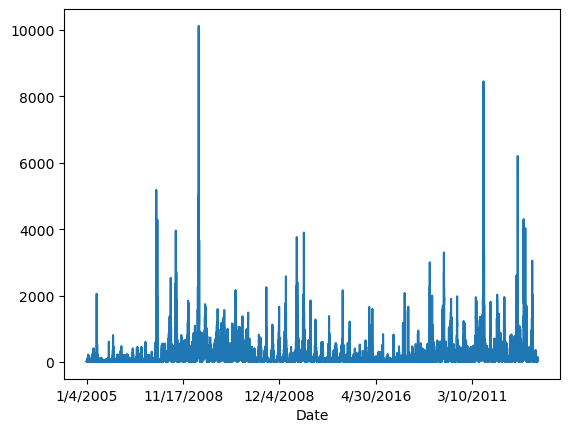

In [14]:
df2['Estimated_fire_area'].plot()

In [18]:
#writing to filtered or structure data to hadoop in a csv format
client_hdfs = InsecureClient('http://localhost:50070')
with client_hdfs.write('/user/enginsan/filtered_data.csv', encoding = 'utf-8') as writer :
    df2.to_csv(writer)

In [ ]:
#after checking hdfs directories from HADOOP localhost, then create "spark schema" and load into 
#pyspark to query and make transformations with SQL 

In [16]:
import os
os.environ['JAVA_HOME']='/Library/Java/JavaVirtualMachines/adoptopenjdk-8.jdk/Contents/Home'
print(os.environ['JAVA_HOME'])

/Library/Java/JavaVirtualMachines/adoptopenjdk-8.jdk/Contents/Home


In [18]:
import pyspark 
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType
from pyspark.sql import DataFrameReader
from pyspark.sql import DataFrameWriter

In [20]:
spark = SparkSession.builder.getOrCreate()
print(spark.version)

24/09/02 14:55:31 WARN Utils: Your hostname, Engins-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.109.46 instead (on interface en0)
24/09/02 14:55:31 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/02 14:55:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


3.5.1


In [ ]:
#create a spark schema or load directly by inferSchema "filtered_data.csv" from hadoop into:
#firesSchema = StructType() \
                    	#.add("id", "integer")\
                    	#.add("...", "string")\
                    	#.add("...", "string")\
                    	#.add("...", "string")

In [163]:
#reading from hadoop
df_fires = spark.read.csv("hdfs://localhost:9000/user/enginsan/filtered_data.csv", header=True, inferSchema=True)

In [165]:
# Display schema of DataFrame
df_fires.printSchema()

# Show the initial DataFrame
print("Initial DataFrame:")
df_fires.show(10)

root
 |-- Date: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Estimated_fire_area: double (nullable = true)
 |-- Mean_estimated_fire_brightness: double (nullable = true)
 |-- Mean_estimated_fire_radiative_power: double (nullable = true)
 |-- Mean_confidence: double (nullable = true)
 |-- Std_confidence: double (nullable = true)
 |-- Var_confidence: double (nullable = true)
 |-- Count: integer (nullable = true)
 |-- Replaced: string (nullable = true)

Initial DataFrame:
+---------+------+-------------------+------------------------------+-----------------------------------+---------------+--------------+--------------+-----+--------+
|     Date|Region|Estimated_fire_area|Mean_estimated_fire_brightness|Mean_estimated_fire_radiative_power|Mean_confidence|Std_confidence|Var_confidence|Count|Replaced|
+---------+------+-------------------+------------------------------+-----------------------------------+---------------+--------------+--------------+-----+--------+
| 1

In [167]:
# Register the DataFrame as a Temporary Table
df_fires.createOrReplaceTempView("my_table")

In [169]:
# Some SQL Queries: 1-Find the number of fires ocurred in 6/6/2017 in the QL region
result = spark.sql("SELECT Date, Region, Sum(Count) as Number_of_Fires FROM my_table \
GROUP BY Region, Date \
HAVING Date = '6/6/2017' and Region = 'QL';")

result.show()

+--------+------+---------------+
|    Date|Region|Number_of_Fires|
+--------+------+---------------+
|6/6/2017|    QL|             74|
+--------+------+---------------+



In [171]:
# Some SQL Queries: 2-Find and sort the most number of fires ocurred after 2015 in all regions 

result2 = spark.sql("SELECT Date, Region, Sum(Count) as Number_of_Fires FROM my_table \
GROUP BY Region, Date \
HAVING Date >= '1/1/2015' \
ORDER BY Region, Number_of_Fires DESC;")

result2.show()


+----------+------+---------------+
|      Date|Region|Number_of_Fires|
+----------+------+---------------+
|  1/4/2020|   NSW|           3365|
| 11/8/2019|   NSW|           2355|
|12/30/2019|   NSW|           2185|
| 12/5/2019|   NSW|           1784|
| 12/6/2019|   NSW|           1688|
|11/12/2019|   NSW|           1682|
|12/21/2019|   NSW|           1593|
| 11/7/2019|   NSW|           1406|
|12/19/2019|   NSW|           1364|
| 11/9/2019|   NSW|           1237|
| 12/4/2019|   NSW|           1180|
|12/18/2019|   NSW|           1117|
|12/31/2019|   NSW|           1103|
|11/15/2019|   NSW|           1064|
| 12/7/2019|   NSW|           1060|
| 12/3/2019|   NSW|           1043|
|11/29/2006|   NSW|           1012|
|11/19/2019|   NSW|            960|
|  1/3/2020|   NSW|            930|
|  2/1/2020|   NSW|            876|
+----------+------+---------------+
only showing top 20 rows



In [173]:
#converting the query result to pandas dataframe to save in hadoop cluster
pandas_df = result2.toPandas()


In [175]:
pandas_df.head()

,Date,Region,Number_of_Fires
0,1/4/2020,NSW,3365
1,11/8/2019,NSW,2355
2,12/30/2019,NSW,2185
3,12/5/2019,NSW,1784
4,12/6/2019,NSW,1688


In [22]:
#spark.stop()

In [24]:
#spark = SparkSession.builder.getOrCreate()
#print(spark.version)

#writing pandas df as in json format in hadoop cluster
client_hdfs = InsecureClient('http://localhost:50070')
with client_hdfs.write('/user/enginsan/filtered_data.json', encoding = 'utf-8') as writer :
    pandas_df.to_json(writer)


In [26]:
#reading local json data in spark:
json_dt=spark.read.json("/Users/enginsan/Downloads/us-states.json")

In [28]:
json_dt.show()

+--------------------+--------------------+----+-------------+-------+
|     _corrupt_record|            geometry|  id|   properties|   type|
+--------------------+--------------------+----+-------------+-------+
|{"type":"FeatureC...|                NULL|NULL|         NULL|   NULL|
|                NULL|{[[[-87.359296, 3...|  AL|    {Alabama}|Feature|
|                NULL|{[[[[-131.602021,...|  AK|     {Alaska}|Feature|
|                NULL|{[[[-109.042503, ...|  AZ|    {Arizona}|Feature|
|                NULL|{[[[-94.473842, 3...|  AR|   {Arkansas}|Feature|
|                NULL|{[[[-123.233256, ...|  CA| {California}|Feature|
|                NULL|{[[[-107.919731, ...|  CO|   {Colorado}|Feature|
|                NULL|{[[[-73.053528, 4...|  CT|{Connecticut}|Feature|
|                NULL|{[[[-75.414089, 3...|  DE|   {Delaware}|Feature|
|                NULL|{[[[-85.497137, 3...|  FL|    {Florida}|Feature|
|                NULL|{[[[-83.109191, 3...|  GA|    {Georgia}|Feature|
|     

In [30]:
json_dt.printSchema()

root
 |-- _corrupt_record: string (nullable = true)
 |-- geometry: struct (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: array (containsNull = true)
 |    |    |    |-- element: array (containsNull = true)
 |    |    |    |    |-- element: string (containsNull = true)
 |    |-- type: string (nullable = true)
 |-- id: string (nullable = true)
 |-- properties: struct (nullable = true)
 |    |-- name: string (nullable = true)
 |-- type: string (nullable = true)



In [34]:
# Register the DataFrame as a SQL temporary view
json_dt.createOrReplaceTempView("us_states_geo")

sqlDF = spark.sql("SELECT * FROM us_states_geo")
sqlDF.show()

+--------------------+--------------------+----+-------------+-------+
|     _corrupt_record|            geometry|  id|   properties|   type|
+--------------------+--------------------+----+-------------+-------+
|{"type":"FeatureC...|                NULL|NULL|         NULL|   NULL|
|                NULL|{[[[-87.359296, 3...|  AL|    {Alabama}|Feature|
|                NULL|{[[[[-131.602021,...|  AK|     {Alaska}|Feature|
|                NULL|{[[[-109.042503, ...|  AZ|    {Arizona}|Feature|
|                NULL|{[[[-94.473842, 3...|  AR|   {Arkansas}|Feature|
|                NULL|{[[[-123.233256, ...|  CA| {California}|Feature|
|                NULL|{[[[-107.919731, ...|  CO|   {Colorado}|Feature|
|                NULL|{[[[-73.053528, 4...|  CT|{Connecticut}|Feature|
|                NULL|{[[[-75.414089, 3...|  DE|   {Delaware}|Feature|
|                NULL|{[[[-85.497137, 3...|  FL|    {Florida}|Feature|
|                NULL|{[[[-83.109191, 3...|  GA|    {Georgia}|Feature|
|     

In [49]:
#writing json file to hdfs:
json_dt.write.mode('Overwrite').json("hdfs://localhost:9000/user/enginsan/us_states.json")


from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("IncreaseMemory") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .config("spark.executor.instances", "4") \
    .config("spark.executor.cores", "2") \
    .getOrCreate()

In [51]:
# Step 3: Read the same JSON file from hdfs into a DataFrame
df = spark.read.json("hdfs://localhost:9000/user/enginsan/us_states.json")

# Step 4: Show the DataFrame contents
df.show()
df.printSchema()

# Step 5: Stop the Spark session
spark.stop()

+---------------+--------------------+----+-------------+-------+
|_corrupt_record|            geometry|  id|   properties|   type|
+---------------+--------------------+----+-------------+-------+
|           NULL|                NULL|NULL|         NULL|   NULL|
|           NULL|{[[[-87.359296, 3...|  AL|    {Alabama}|Feature|
|           NULL|{[[[[-131.602021,...|  AK|     {Alaska}|Feature|
|           NULL|{[[[-109.042503, ...|  AZ|    {Arizona}|Feature|
|           NULL|{[[[-94.473842, 3...|  AR|   {Arkansas}|Feature|
|           NULL|{[[[-123.233256, ...|  CA| {California}|Feature|
|           NULL|{[[[-107.919731, ...|  CO|   {Colorado}|Feature|
|           NULL|{[[[-73.053528, 4...|  CT|{Connecticut}|Feature|
|           NULL|{[[[-75.414089, 3...|  DE|   {Delaware}|Feature|
|           NULL|{[[[-85.497137, 3...|  FL|    {Florida}|Feature|
|           NULL|{[[[-83.109191, 3...|  GA|    {Georgia}|Feature|
|           NULL|{[[[[-155.634835,...|  HI|     {Hawaii}|Feature|
|         

In [57]:
type(df)

pyspark.sql.dataframe.DataFrame

In [59]:
#Connect and retrieve data (above wildfires csv data loaded by using importtsv method as hbase table into hbase server) from HBASE:


In [ ]:
#start hbase thrift service start by terminal: hbase thrift start

In [6]:
import happybase

# Connect to the HBase Thrift server
connection = happybase.Connection(host='localhost', port=9090)  

# Open the connection
connection.open()

# Specify the table name
table_name = 'fires_data'  # Replace with your table name

# Access the table
table = connection.table(table_name)

In [8]:
print(table)

<happybase.table.Table name=b'fires_data'>


In [10]:
row = table.row(b'NSW')
print(row)   # prints the value of cf1:col1

{b'cf:Count': b'N', b'cf:Date': b'20.276', b'cf:Estimated_fire_area': b'315.04', b'cf:Mean_confidence': b'6.418722614', b'cf:Mean_estimated_fire_brightness': b'88.46', b'cf:Mean_estimated_fire_radiative_power': b'82.2', b'cf:Region': b'10/31/2020', b'cf:Std_confidence': b'41.2', b'cf:Var_confidence': b'5'}


In [12]:
row2 = table.row(b'NSW')
print(row2[b'cf:Date'])   # prints the value of cf1:col1

b'20.276'


In [14]:
for key, data in table.scan(row_start=b'NSW'):
    print(key, data)

b'NSW' {b'cf:Count': b'N', b'cf:Date': b'20.276', b'cf:Estimated_fire_area': b'315.04', b'cf:Mean_confidence': b'6.418722614', b'cf:Mean_estimated_fire_brightness': b'88.46', b'cf:Mean_estimated_fire_radiative_power': b'82.2', b'cf:Region': b'10/31/2020', b'cf:Std_confidence': b'41.2', b'cf:Var_confidence': b'5'}
b'NT' {b'cf:Count': b'N', b'cf:Date': b'115.5884615', b'cf:Estimated_fire_area': b'327.1173077', b'cf:Mean_confidence': b'8.352337305', b'cf:Mean_estimated_fire_brightness': b'218.4730769', b'cf:Mean_estimated_fire_radiative_power': b'89.19230769', b'cf:Region': b'10/31/2020', b'cf:Std_confidence': b'69.76153846', b'cf:Var_confidence': b'26'}
b'QL' {b'cf:Count': b'N', b'cf:Date': b'297.6278261', b'cf:Estimated_fire_area': b'321.7671498', b'cf:Mean_confidence': b'8.621925622', b'cf:Mean_estimated_fire_brightness': b'61.61304348', b'cf:Mean_estimated_fire_radiative_power': b'90.64251208', b'cf:Region': b'10/31/2020', b'cf:Std_confidence': b'74.33760143', b'cf:Var_confidence': b'

In [16]:
#connect to hbase, read data and convert to pandas data frame:
import happybase
import pandas as pd

# Connect to the HBase Thrift server
connection = happybase.Connection(host='localhost', port=9090)  # Replace 'localhost' and '9090' with your HBase server details
connection.open()

# Specify the table name
table_name = 'fires_data'  # Replace with your table name
table = connection.table(table_name)

# Retrieve data using scan (scans all rows by default)
rows = table.scan()

# Prepare data for Pandas DataFrame
data = []
columns = set()  # To collect all column names dynamically

# Iterate over the rows
for key, row_data in rows:
    # Create a dictionary including the row key and column data
    row = {'row_key': key.decode('utf-8')}  # Decode the row key from bytes
    for column, value in row_data.items():
        column_name = column.decode('utf-8')  # Decode column names
        row[column_name] = value.decode('utf-8')  # Decode values (assuming they are strings)
        columns.add(column_name)
    data.append(row)

# Convert to DataFrame
columns = ['row_key'] + sorted(columns)  # Define DataFrame columns including row key
df = pd.DataFrame(data, columns=columns)

# Close the connection
connection.close()

# Display the DataFrame
print(df)

  row_key  cf:Count              cf:Date          cf:Estimated_fire_area  \
0     NSW         N               20.276                          315.04   
1      NT         N          115.5884615                     327.1173077   
2      QL         N          297.6278261                     321.7671498   
3  Region  Replaced  Estimated_fire_area  Mean_estimated_fire_brightness   
4      SA         N                 1.68                           334.3   
5      TA         N                  3.3                             315   
6      VI         N                    2                           317.6   
7      WA         N          107.3708511                     330.0574468   

  cf:Mean_confidence    cf:Mean_estimated_fire_brightness  \
0        6.418722614                                88.46   
1        8.352337305                          218.4730769   
2        8.621925622                          61.61304348   
3     Std_confidence  Mean_estimated_fire_radiative_power   
4         

In [18]:
df.head()

,row_key,cf:Count,cf:Date,cf:Estimated_fire_area,cf:Mean_confidence,cf:Mean_estimated_fire_brightness,cf:Mean_estimated_fire_radiative_power,cf:Region,cf:Std_confidence,cf:Var_confidence
0,NSW,N,20.276,315.04,6.418722614,88.46,82.2,10/31/2020,41.2,5
1,NT,N,115.5884615,327.1173077,8.352337305,218.4730769,89.19230769,10/31/2020,69.76153846,26
2,QL,N,297.6278261,321.7671498,8.621925622,61.61304348,90.64251208,10/31/2020,74.33760143,207
3,Region,Replaced,Estimated_fire_area,Mean_estimated_fire_brightness,Std_confidence,Mean_estimated_fire_radiative_power,Mean_confidence,Date,Var_confidence,Count
4,SA,N,1.68,334.3,,80.2,96,10/22/2020,,1
